### Modal SNA MAP473D, Ecole Polytechnique, 2018-19

$\newcommand{\mc}[1]{\mathcal{#1}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\P}{\mathbb{P}}$
$\newcommand{\Q}{\mathbb{Q}}$
$\newcommand{\E}{\mathbb{E}}$
$\DeclareMathOperator{\Var}{Var}$
$\newcommand{\Pth}{\P_\theta}$
$\newcommand{\Lth}{L_\theta}$
$\newcommand{\Eth}{\E_\theta}$
$\newcommand{\Vth}{\Var_\theta}$
$\newcommand{\one}{\mathbb{1}}$
$\DeclareMathOperator{\d}{d\!}$
$\newcommand{\pscal}[2]{\langle{#1},{#2}\rangle}$

***
**Soumission du TP pour évaluation:** 
- Remplir ce notebook et déposer sur le moodle le fichier notebook ".ipynb" ainsi qu'une sauvegarde (export) au format ".html".
- Les réponses aux questions théoriques peuvent être saisies (en latex) dans le notebook ou bien être rendues sur feuille libre avant 17h45 aux enseignants. 
- Les dépots sur le moodle doivent se faire le vendredi 29 mars avant 20h. 
***

**Noms du binôme:** _A REMPLIR_

# TP3 - Echantillonnage d’importance, changements de probabilités gaussiens

## Partie 1. Rappel de cours : changements de probabilités, échantillonnage préférentiel et grandes déviations
Soit $X$ une v.a. à valeurs dans $\R^d$, définie sur un espace de probabilité $(\Omega, \mc{F}, \P)$. On notera $\E$ l'espérance associée à la probabilité $\P$.

### 1.1 Principe général du changements de probabilité
Soit $L:\R^d \to \R^*_+$ une fonction mesurable telle que $$\E[L(X)]=1.$$

Notons $\Q$ la loi de probabilité sur $(\Omega, \mc{F})$, de densité $L(X)$ par rapport à $\P$, et $\E_\Q$ l'espérance associée. Par définition de $\Q$, pour toute fonction $g: \R^d \to \R$ mesurable bornée, on a
<a id='eq:Principe:IS'></a>
$$ \tag{1}
    \E[g(X)]=\E \left[ \frac{g(X)}{L(X)} \, L(X) \right]=\E_{\mathbb{Q}}\left[ \frac{g(X)}{L(X)} \right].
$$

### 1.2 Changements de probabilité inspirés par les grandes déviations (cas $d=1$)<a id='sec:12'></a>
On définit l'ensemble convexe
$$ 
    \mc{D} = \{ \theta \in \R~:  \E\!\left[e^{\theta X} \right]<\infty \}
$$  
et la fonction $\psi: \mc{D} \to \R$ dite _fonction génératrice des cumulants_ de $X$, par 
$$
    \psi(\theta) = \log \E\!\left[ e^{\theta X} \right].
$$
On fait l'hypothèse que la loi de $X$ sous $\P$ est telle que $\mc{D}$ est non vide. Pour tout $\theta \in \mc{D}$, on peut définir la loi $\Pth$, de densité $\Lth(X)$ par rapport à $\P$ où
$$
    \Lth(x) = \exp\left(\theta x - \psi(\theta)\right), \qquad x \in \R,
$$
(noter que $\E[\Lth(X)] =1$); de sorte que la famille de lois $\{\Pth, \theta \in \mc{D} \}$ donne des exemples de changements de probabilité $\P \to \Pth$. Lorsque $\theta = 0$, $\P$ et $\Pth$ coïncident puisque $L_0(x) =1$. Dans la suite, on utilisera les notations $\Eth$ et $\Vth$ plutôt que $\E_{\Pth}$ et $\Var_{\Pth}$ respectivement.

On peut montrer que pour tout $\theta$ dans l'intérieur de $\mc{D}$, l'espérance et la variance de $X$ sous $\Pth$ sont liées aux dérivées successives de $\psi$ (voir par exemple le Corollaire 7.2  dans __[Information and Exponential Families](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118857281)__) 
<a id='eq_esp_var2'></a>
$$\tag{2}
    \Eth[X]=\psi'(\theta),\qquad \qquad 
    \Vth(X)=\psi''(\theta);
$$
et en particulier, lorsque $\theta = 0$ est dans l'intérieur de $\mc{D}$,
$$ 
    \E[X]=\psi'(0),\qquad \qquad 
    \Var(X)=\psi''(0).
$$

Le succès de cette technique de changement de loi dépend de la capacité à identifier la loi de $X$ sous $\Pth$ et à faire des tirages _i.i.d._ sous cette loi.  Par exemple, nous montrerons en section 3.1 que si $X\sim \mc{N}(0,1)$ sous $\P$, alors $X\sim \mc{N}(\theta,1)$ sous $\Pth$. La transformation de Esscher donnera des formules du même type, lorsque sous $\P$, $X$ est un processus de Poisson composé.

### 1.3 Application à l'approximation Monte Carlo de la fonction de survie
Supposons que l'objectif soit d'approcher la quantité $\P[X>a]$ par une méthode de Monte Carlo. La méthode de Monte Carlo naïve consiste en l'approximation
<a id='eq:MC:naif'></a>
$$ \tag{3}
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \one_{X_k>a} \quad 
    \text{avec $\{X_k, k \geq 1 \}$, indépendantes de même loi que $X$ sous $\P$.}
$$

Néanmoins, pour la loi $\Q$ de densité $L(X)$ par rapport à $\P$, on a aussi la relation (relire l'équation [(1)](#eq:Principe:IS) avec la fonction $g(x) = \one_{]a, +\infty[}(x)$)
$$
    \P(X>a) = \E_\Q\left[ L(X)^{-1} \, \one_{X>a} \right].
$$ 
On déduit de cette égalité une autre approximation
<a id='eq:MC:loiQ'></a>
$$ \tag{4}
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \frac{1}{L(Y_k)}\one_{Y_k>a} \quad 
    \text{avec $\{Y_k, k \geq 1 \}$, indépendantes de même loi que $X$ sous $\Q$.}
$$


Dans le cas particulier où $\Q$ est de la forme $\Pth$, l'approximation $(4)$ devient
<a id='eq:MC:Ptheta'></a>
$$ \tag{5}
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \exp\left( \psi(\theta) - \theta \, Y_k \right) \, \one_{Y_k>a}, \qquad
    \text{$\{Y_k, k \geq 1 \}$ indépendantes de même loi que $X$ sous $\Pth$;}
$$
la difficulté pour l'utilisateur est de choisir la valeur $\theta \in \mc{D}$ la plus "efficace".  La relation [(2)](#eq_esp_var2) suggère de choisir $\theta$ égal à la solution de $\psi'(\theta) = a$ (valeur que nous noterons $\theta_a$), puisqu'avec ce choix, sous $\P_{\theta_a}$, la loi de $X$ est centrée en $a$. Ce n'est pas nécessairement le choix optimal - selon un critère d'optimalité basé sur la réduction de variance (voir section 3.1) - mais cela donne un échantillonneur Monte Carlo plus efficace que l'échantillonneur Monte Carlo naïf. 

## Partie 2. Echantillonnage d'importance pour des v.a. de Bernoulli
Les v.a. sont définies sur $(\Omega, \mathcal{A}, \P)$.

***
#### Question 1:
Soient $X_1, \cdots, X_n$ des v.a. indépendantes de loi de Bernoulli $B(p_1), \ldots, B(p_n)$; et $Z_1, \ldots, Z_n$ des v.a. indépendantes de lois de Bernoulli $B(q_1), \ldots, B(q_n)$.
Montrer que pour toute fonction $g:\{0,1\}^n \to\mathbb R$ mesurable bornée, on a
\begin{eqnarray*} 
  \E \left[ g(X_1, \ldots, X_n) \right] &=& \E \left[ g(Z_1, \ldots, Z_n) \, \prod_{i=1}^n \left(\one_{Z_i=0}\frac{1-p_i}{1-q_i}+1_{Z_i=1}\frac{p_i}{q_i}\right) \right]
  \\
                                        &=& \left( \prod_{i=1}^n\frac{1-p_i}{1-q_i} \right) \  \E\left[ g(Z_1, \ldots,Z_n) \ \prod_{i=1}^n\left(\frac{p_i(1-q_i)}{q_i(1-p_i)}\right)^{Z_i} \right]
\end{eqnarray*}

##### Réponse: 

***
#### Question 2:
Soit $n\ge 1$, $p,q\in ]0,1[$; et $S,S'$ deux v.a. respectivement de loi binomiale $\operatorname{Binom}(n,p)$ et de loi binomiale $\operatorname{Binom}(n,q)$. Déduire de la question précédente que pour toute fonction $f:\{0, \ldots, n\} \to \R$, on a
$$
    \E \left[ f(S) \right] 
    = \E \left[ f(S')\left(\frac{p}{q}\right)^{S'}\left(\frac{1-p}{1-q}\right)^{n-S'} \right] 
    = \left(\frac{1-p}{1-q}\right)^n \E\left[f(S')\left(\frac{p(1-q)}{q(1-p)}\right)^{S'} \right].
$$

##### _Réponse:_

***
#### Question 3:
Pour $S$ de loi binomiale $\operatorname{Binom}(n,p)$ et $x \in ]0,p[$, estimer $\P(S \le nx)$ des trois façons suivantes:
- en utilisant la fonction de calcul exact de cette probabilité `scipy.stats.binom.cdf`,
- par un Monte Carlo standard en simulant $N$ copies de $S$ avec la fonction `np.random.binomial` ou `scipy.stats.binom.rvs`,
- en utilisant la question 2 et en simulant $N$ copies de $S'$.

On pourra choisir par exemple $n=300$, $p=0.25$, $x=0.001$, $q=x$ et $N=10^6$. 

## Partie 3. Changement de probabilité dans un modèle gaussien
Dans cette section, $X \sim \mathcal{N}(0,1)$ sous $\P$.  Nous cherchons à calculer $\P(X>a)$ puis $\P(|X|>a)$ pour des valeurs assez élevées de $a$ de sorte que l'événement puisse être qualifié de rare (bien entendu, ces deux probabilités sont liées par la relation $\P(|X|>a)=2\P(X>a)$). Nous avons la relation, pour tout $a>0$,
$$
    \frac{1}{a+1/a} \frac{1}{\sqrt{2\pi}} e^{-\frac{a^2}{2}} 
    \le \P(X>a) \le 
    \frac{1}{a} \frac{1}{\sqrt{2\pi}} e^{-\frac{a^2}{2}},
$$
ce qui entraine quand $a \to +\infty$,
$$ 
    \P(X>a) \simeq \frac{1}{a }\frac{1}{\sqrt{2\pi}} e^{-\frac{a^2}{2}}.
$$
Ainsi, comme $e^{\frac{2.15^2}{2}} \simeq 10$, $\P(X>a)$ et$\P(|X|>a)$ sont de l'ordre de $10^{-\left(\frac{a}{2.15}\right)^2}$: des valeurs de $a$ comprises dans l'intervalle $[5,8]$ correspondent à notre champ d'investigation. Nous considérons deux changements de probabilité pour améliorer le comportement de l'échantillonneur de Monte Carlo naïf
$$
    \P(X>a) \simeq \frac{1}{n} \sum_{k=1}^n \one_{X_k > a} \qquad \text{où $\{X_k, k \geq 1 \}$ i.i.d. $\mathcal{N}(0,1)$.}
$$



### 3.1 Changement de probabilité par décentrage
Ce changement de probabilité repose sur le changement de loi $\P \to \Pth$ décrit en [section 1.2](#sec:12).  

La fonction génératrice des cumulants de $X$ est définie sur $\mc{D} = \R$ et vaut $\psi(\theta) =\theta^2/2$. Identifions la loi $\Pth$: la relation [(1)](#eq:Principe:IS) appliquée avec $\Q = \Pth$, montre que pour toute fonction $f:\R \to \R_+$ mesurable
\begin{align*}
  \Eth \left[ f(X) \right] = \E \left[ f(X) L_\theta(X) \right] 
  &= \frac{1}{\sqrt{2\pi}} \int_\R f(x) \exp \left(\theta x - \theta^2/2 \right) \exp(-x^2/2) \d x  \\
  &= \frac{1}{\sqrt{2\pi}} \int_\R f(x) \exp \left(-(x-\theta)^2/2 \right) \d x
\end{align*}
on en déduit que sous $\Pth$, $X \sim \mathcal{N}(\theta,1)$.

***
#### Question 4.
Simuler $n \gg 1$ gaussiennes indépendantes de loi $\mc{N}(0,1)$ avec lesquelles on estimera $\P(X>a)$ d'abord par l'estimateur naïf [(3)](#eq:MC:naif), puis par l'estimateur [(5)](#eq:MC:Ptheta) appliqué avec $\theta = \theta_a$, la solution de l'équation $\psi'(\theta) = a$.  Pour chacun des estimateurs, utiliser le TCL pour construire un intervalle de confiance asymptotique de probabilité de couverture $95 \%$. Comparer à la valeur exacte de $\P(X>a)$.

***
#### Question 5.
La longueur de l'intervalle de confiance est une fonction croissante de la variance de l'estimateur: on veut donc choisir $\theta$ qui minimise cette variance.  Nous allons montrer que le choix de $\theta$ fait dans la question précédente pourrait être amélioré si le critère d'optimalité souhaité est de minimiser la variance du nouvel estimateur.

a) Montrer que choisir $\theta$ qui minimise la variance de l'estimateur donné par [(5)](#eq:MC:Ptheta), revient à choisir $\theta$ qui minimise
$$
    \theta \mapsto \E\left[ \one_{X > a} \exp\left(\frac{\theta^2}{2} - \theta X \right) \right].
$$

b) Montrer que cette fonction est convexe et qu'elle possède un unique minimum donné par la solution de
$$
    \E\left[ \one_{X > a} (\theta - X) \exp\left(- \theta X \right) \right] = 0,
$$
(on admettra que le modèle est régulier i.e. que l'on permuter dérivée et intégration).

c) En déduire que prendre $\theta = \theta_a$ est meilleur que prendre $\theta = 0$; et que la valeur de $\theta$ la plus efficace est en fait supérieure à $\theta_a$. 


##### _Réponse:_
Un intervalle de confiance asymptotique de probabilité de couverture $0.95$ pour l'estimateur Monte Carlo $\hat{I}_{n}(\theta)$ déduit de (5) est donné par
$$
    \left[\hat{I}_{n}(\theta) \pm \frac{1.96}{\sqrt{n}} \sigma(\theta) \right]
$$
où
$$
    \sigma^2(\theta) = \Eth\left[ \exp(2 \psi(\theta) - 2 \theta X) \one_{X>a} \right] - \left(\E_\theta\left[ \exp(\psi(\theta) -
    \theta X) \one_{X>a}\right] \right)^2.
$$
Par la relation (1)  on a  
$$
    \Eth\left[ \exp(\psi(\theta) - \theta X) \one_{X>a}\right] = \E\left[ \one_{X>a}\right]
$$
de sorte que cette quantité est indépendante de $\theta$. Par suite, minimiser la taille de l'intervalle de confiance, revient à minimiser 
\begin{align*}
  \theta \mapsto &\Eth \left[ \exp(2 \psi(\theta) - 2 \theta X)
                   \one_{X>a} \right] = \frac{1}{\sqrt{2 \pi}}\int_a^{\infty}
                   \exp(\theta^2 - 2 \theta x) \exp(-(x-\theta)^2/2) \d x  \\
                 & = \frac{1}{\sqrt{2 \pi}}\int_a^{\infty} \exp(\theta^2/2  - \theta x) \exp(-x^2/2) 
                 \d x = \E\left[ \exp(\theta^2/2 - \theta X) \one_{X>a}\right].
\end{align*}
Les dérivées première et seconde de cette quantité sont resp. données par 
$$
    \theta \mapsto \E\left[(\theta-X) \exp(\theta^2/2 - \theta X) \one_{X>a} \right], 
    \qquad \theta \mapsto \E\left[ \left\{ 1+ (\theta-X)^2 \right\} \  \exp(\theta^2/2 - \theta X) \one_{X>a}
\right].
$$
dont on déduit que la fonction est convexe. De plus, puisque $\exp(u) \geq 1+u$, on a 
$$
    \E\left[ \exp(\theta^2/2 - \theta X) \one_{X>a}\right] \geq (1+\frac{\theta^2}{2}) \P(X>a) - \theta \E\left[X \one_{X>a} \right]
$$
dont on déduit que la fonction tend vers $+\infty$ lorsque $|\theta| \to +\infty$. Par suite, le minimum $\theta_\star$ de cette fonction existe et est unique. Il est racine du gradient i.e. il satisfait
$$
    \E\left[ (\theta_\star -X) \exp(\theta_\star^2/2 - \theta_\star X) \one_{X>a} \right] = 0.
$$
En particulier, la convexité entraine que toute valeur de $\theta \in ]-\infty, \theta_\star[$ conduit à un estimateur $\hat{I}_n(\theta)$ de variance plus élevée que celle de $\hat{I}_n(\theta_\star)$. Le gradient évalué en $0$ est négatif; on en déduit que $0<\theta_\star$.  Ici, $\theta_a =a>0$ et on vérifie par le calcul que le gradient évalué en $\theta_a$ est aussi négatif; on en déduit que $\theta_a < \theta_\star$.

### 3.2 Changement de probabilité par modification de la variance
Le changement de probabilité par modification de la variance repose sur l'observation suivante: pour toute fonction $f: \R \to \R$ mesurable bornée, on a
$$
    \E[f(X)] = \E \left[\sigma f(\sigma X)e^{-\frac{(\sigma^2-1)}{2} X^2} \right] 
    = \E_{\P_\sigma}\left[ \sigma f(X) \, e^{-\frac{(\sigma^2-1)}{2 \sigma^2}X^2} \right]
$$
où sous $\P_\sigma$, $X \sim \mc{N}(0, \sigma^2)$. On peut donc estimer $\E[f(X)]$ en appliquant la méthode de Monte Carlo naïve, ou en utilisant l'estimateur
\begin{equation} \label{eq:MC:Psi} 
    \E[f(X)] \simeq \frac{\sigma}{n} \sum_{k=1}^n \, f(Y_k) \, e^{-\frac{(\sigma^2-1)}{2 \sigma^2} Y_k^2} , \qquad
  \text{$\{Y_k, k \geq 1 \}$ i.i.d.  de loi $\mc{N}(0,\sigma^2)$.}
\end{equation}
Là encore, le choix de $\sigma$ n'est pas anodin sur la qualité de l'estimateur, et selon un critère de réduction de variance, on choisira $\sigma = \sigma_\star$ où $\sigma_\star$ est solution de
$$
    \operatorname{argmin}_{\sigma > 0} \sigma^2 \E \left[ f^2(\sigma X) e^{-(\sigma^2-1)X^2} \right].
$$
Bien souvent, on n'a pas d'expression explicite de cette valeur optimale, et la détermination de $\sigma_\star$ est une des principales difficultés de l'implémentation de cette méthode. Dans l'application numérique suivante, nous utiliserons une technique rudimentaire.

***
#### Question 6.
Se donner $\mc{S}$, une version discrétisée de l'intervalle $\left[\frac{1}{2} a, 3a \right]$.  Simuler $n_1$ gaussiennes centrées réduites, et avec ce même jeu de simulations, pour chaque valeur $\sigma \in \mc{S}$, calculer une approximation Monte Carlo de la quantité 
$$
    \sigma^2 \E \left[ \one_{|\sigma X| >a} e^{-(\sigma^2-1)X^2} \right].
$$
En déduire une approximation $\hat{\sigma}_\star$ de $\sigma_\star$.

***
#### Question 7.
Simuler $n_2$ autres gaussiennes centrées réduites $X_1, \dots, X_{n_2}$ ($n_2 \gg n_1$). Avec ce même jeu de simulations, proposer une estimation de $\P(|X| >a)$ via la méthode de Monte Carlo naïve, et une estimation via la formule
$$
    \P(|X|>a) \simeq \frac{\sigma}{n_2} \sum_{k=1}^{n_2} \one_{|\sigma X_k| > a} e^{-\frac{(\sigma^2-1)}{2} X_k^2}
$$
tout d'abord pour $\sigma = \hat{\sigma}_\star$ puis pour $\sigma = a$.

Pour chacun des trois cas, utiliser le TCL pour construire un intervalle de confiance asymptotique de probabilité de couverture $95\%$. Comparer à la valeur exacte de $\P(|X|>a)$.

## Partie 4. Algorithme adaptatif de moyenne optimale dans le cas gaussien multidimensionnel

Dans cette section, sous $\P$, $X$ est un vecteur gaussien de $\R^d$ standard, $X \sim \mc{N}(0,I_d)$ où $I_d$ désigne la matrice identité de taille $d \times d$. On note $\pscal{a}{b}$ le produit scalaire usuel sur $\R^d$ et $\|\cdot \|$ la norme euclidienne associée. Pour un vecteur $a$, $a'$ est la transposée. Par convention, les vecteurs sont des vecteurs colonnes.

On cherche à calculer $\E[f(X)]$ pour une fonction $f: \R^d \to \R$ mesurable telle que pour tout $\theta\in \R^d$,
$$
    0<\E \left[f^2(X) \ e^{-\pscal{\theta}{X}}\right]<\infty.
$$
Pour ce faire, on peut implémenter un estimateur de Monte Carlo naïf ou exploiter la relation
<a id='eq:IS:multidim'></a>
$$ \tag{6}
  \E[h(X)]=\E \left[h(X + \theta) \, e^{-\pscal{\theta}{X}-\|\theta\|^2/2} \right],
$$ </a>
valable pour tout $\theta \in \R^d$, et toute fonction $h: \R^d \to \R$ mesurable positive. L'objectif de cette section est d'apprendre, par une procédure adaptative, la valeur optimale du paramètre $\theta$.

#### Algorithme de Lelong et Jourdain
D'après l'article [Robust adaptive importance sampling for normal random vectors](https://projecteuclid.org/euclid.aoap/1255699541). On déduit de [(6)](#eq:IS:multidim) que pour tout $\theta \in \R^d$,
- (i) la v.a.
<a id='eq:IS:JL'></a>
$$ \tag{7}
    M_n(\theta) = \frac{1}{n} \sum_{k=1}^n f(X_k + \theta) \ e^{-\pscal{\theta}{X_k}-\|\theta\|^2/2}, 
    \qquad \text{$\{X_k, k \geq 0\}$ v.a. i.i.d. de loi $\mc{N}(0,1)$}
$$
est un estimateur sans biais de l'objectif $\E\left[f(X)\right]$,
- (ii) sa variance est égale à $n^{-1} \left( \mc{V}(\theta)- \left(\E[f(X)] \right)^2 \right)$, où
$$
    \mc{V}(\theta) = \E \left[f^2(X) e^{- \pscal{\theta}{X}+\|\theta\|^2/2} \right].
$$

On souhaite donc appliquer l'estimateur [(7)](#eq:IS:JL) avec $\theta=\theta_\star$ où $\theta_\star$ minimise $\mc{V}(\theta)$. Cependant, en général, lorsque $\E[f(X)]$ est inconnu, il en est de même pour $\mc{V}(\theta)$ et donc $\theta_\star$ est défini comme un minimiseur d'une fonction incalculable. Or, sous des conditions d'intégrabilité sur $f$, la fonction $\mc{V}$ est de classe $C^2$, strictement convexe et possédant un unique minimum $\theta_\star$; son gradient $G$ et son Hessien $H$ sont donnés par
\begin{align*}
  G(\theta) &= \E \left[ f^2(X) \left( \theta -X \right) e^{- \pscal{\theta}{X}+\|\theta\|^2/2} \right]  \in \R^{d \times 1}, \\
  H(\theta) &= \E \left[ f^2(X) \left( I_d + (\theta-X) (\theta-X)' \right) e^{- \pscal{\theta}{X}+\|\theta\|^2/2} \right]  \in \R^{d \times d},
\end{align*}
$I_d$ désigne la matrice identité de taille $d \times d$. 

Afin d'approcher $\theta_\star$, on va utiliser une version bruitée de la _méthode de Newton_: pour $n$ fixé, $\theta_\star$ sera approché par $\theta_n$ défini comme la limite lorsque $k$ tend vers l'infini, de la suite $\{t_k, k\ge 0\}$ satisfaisant à
<a id='eq:Newton'></a>
$$ \tag{8}
    t_{k+1} = t_k - \left(H_n(t_k)\right)^{-1} \, G_n(t_k)
$$
où $H_n(t), G_n(t)$ sont les approximations Monte Carlo de $H(t)$ et $G(t)$ calculées à partir des mêmes $n$ réalisations indépendantes $X_1, \cdots, X_n$ de v.a. $\mc{N}_d(0,I_d)$:
\begin{align*}
    G_n(\theta) &= \frac{1}{n}\sum_{k=1}^n f^2(X_k) (\theta-X_k)e^{-\pscal{\theta}{X_k}+\|\theta\|^2/2}, \\
    H_n(\theta) &= \frac{1}{n}\sum_{k=1}^n f^2(X_k) \left(I_d + (\theta-X_k)(\theta-X_k)'\right) e^{-\pscal{\theta}{X_k}+\|\theta\|^2/2}.
\end{align*}
En pratique, on se fixe un seuil $\varepsilon > 0$ et on itère la relation [(8)](#eq:Newton) tant que $\|G_n(t_k)\|>\varepsilon$. On obtient alors $\theta_n$; on prendra pour estimateur de $\E[f(X)]$ la quantité $M_n(\theta_n)$ calculée à partir des mêmes tirages $X_1, \cdots, X_n$ que ceux utilisés pour le calcul de $G_n$ et $H_n$.

Les résultats suivants, qui peuvent être démontrés sous hypothèses d'intégrabilité sur la fonction $f$, assurent que la méthode fonctionne (voir l'article [Robust adaptive importance sampling for normal random vectors](https://projecteuclid.org/euclid.aoap/1255699541)): 
- (i) $M_n(\theta_n)$ tend presque sûrement vers $\E[f(X)]$ lorsque $n \to \infty$, 
- (ii) si $\Var(f(X))>0$, la suite de v.a.
$$
    \sqrt{\frac{n}{\mc{V}(\theta_n)-M_n(\theta_n)^2}}(M_n(\theta_n)-\E[f(X)])
$$
converge en loi vers une loi gaussienne standard,
- (iii) $\sqrt{n}(\theta_n-\theta_\star)$ est asymptotiquement gaussienne centrée (sa variance peut être exprimée, de façon relativement complexe, en fonction des paramètres). 

***
#### Question 8.
On se limitera dans cette question au cas $d=1$.  On s'intéresse au cas particulier $f:x \mapsto \left(e^{x} - K\right)^+$, qui correspond au calcul du prix d'une option call en finance (pour $y\in{\mathbb R}$, on note $y^+:=\max(y,0)$). 
Il s'agit d'un exemple jouet puisque $\E[f(X)]$ a une expression explicite donnée par 
<a id='eq:BS'></a>
$$ \tag{9}
    \E[f(X)] = e^{\frac{1}{2}} \, \Phi(1-\ln(K))-K \, \Phi(-\ln(K)), \qquad \text{avec} \quad \Phi(x):=\P(X\le x).
$$
(cette formule n'est plus valable en dimension $d$ supérieure à $1$).

Fixer $n_\mathrm{max} = 10^4$ et simuler $X_1, \cdots, X_{n_\mathrm{max}}$ v.a.  i.i.d. $\mc{N}(0,1)$.

**8.a)** Pour différentes valeurs de $n \leq n_\mathrm{max}$, représenter la fonction
$$
    \mc{V}_n: \theta \mapsto \frac{1}{n} \sum_{k=1}^n f^2(X_k) \exp\left( - \pscal{\theta}{X_k} + \|\theta\|^2/2 \right).
$$
  
  Tracer aussi la suite $\{t_k, 1\leq k \leq \min\{\tau_\varepsilon, 100\}\}$, où $\tau_\varepsilon$ est le premier $k$ tel que $\|G_n(t_k)\|\le \varepsilon$.  Comment cette suite converge-t-elle ?
  
On pourra prendre $K=1$, se limiter à tracer $\mc{V}_n$ sur l'intervalle $[-1,4]$ et prendre $\varepsilon = 0.05$.  <!--
Noter que lorsque $d=1$,
$$
    \theta-\frac{G_n(\theta)}{H_n(\theta)} = 
    \frac{\sum_{k=1}^n f^2(X_k) \left(\theta^3+(1-2\theta^2)X_k+\theta X_k^2 \right) e^{-\theta X_k}}
    {\sum_{k=1}^n f^2(X_k) \left( 1+(\theta-X_k)^2 \right) e^{-\theta X_k}}.
$$
-->

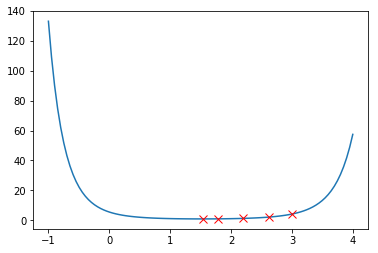

Valeur du gradient en le point final 0.00802
Nombre d iterations avant arret 5
Valeur limite de la suite 1.54


In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

K = 1.
def f(x):
    return np.maximum(np.exp(x) - K, 0) 
# il est important de coder une fonction qui s'applique dans le cas où x est un vecteur

n_max = int(1e4)
iter_max = 100
eps = 0.05

theta_min, theta_max = -1., 4.
grid = np.linspace(theta_min, theta_max, 100)

sample = np.random.randn(n_max) # un échantillon X_1,...,X_n_max

def V(theta, sample):
    ak = f(sample)**2 * np.exp(-theta * sample)
    return np.exp(0.5 * theta**2) * np.mean(ak)

def GH(theta, sample):
    ak = f(sample)**2 * np.exp(-theta * sample)
    Gn = np.mean(ak * (theta - sample)) 
    Hn = np.mean(ak * (1 + (theta - sample)**2))
    return Gn, Hn    

# On produit la suite de Newton bruitee, pour iter_max iterations max et tant que le gradient est trop eleve
tn = [ 3. ]
Gn, Hn = GH(tn[-1], sample)
while np.abs(Gn) > eps and len(tn) < iter_max:
    tn.append(tn[-1] - Gn / Hn)
    Gn, Hn = GH(tn[-1], sample)
       
# Evaluation de la fonction Vn sur un intervalle
# et trace
Vs = [V(theta, sample) for theta in grid]
plt.close()
plt.plot(grid, Vs)

# Evolution de la suite de Newton bruitee
plt.plot(tn, [V(t, sample) for t in tn], "rx", markersize = 8)
plt.show()

# Affichage du critere d arret
print(f"Valeur du gradient en le point final {Gn:1.3}")
print(f"Nombre d iterations avant arret {len(tn)}")
print(f"Valeur limite de la suite {tn[-1]:1.3}")

**8.b)** Tracer sur un même graphique les suites $\{M_n(0), n \geq 0\}$ et $\{M_n(\theta_n), n \geq 0\}$ pour $n$ variant de $100$ à $n_{\mathrm{max}}$ par sauts de $50$ ou de $100$ (de façon à accélérer l'algorithme). 

Pour comparaison, tracer aussi la droite horizontale $y=\E[f(X)]$ où cette constante est calculée avec la formule [(9)](#eq:BS).

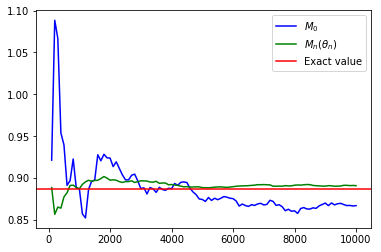

In [2]:
n_max = int(1e4)
step = 100
ns = np.arange(step, n_max+1, step) # entiers espaces de 100

# Calcul de Mn(0) en des valeurs theta definies par ns  
# et trace en bleu
sample = np.random.randn(n_max)
M0 = np.cumsum(f(sample)) / np.arange(1, n_max+1)

def M(theta, sample):
    ak = f(sample + theta) * np.exp(-theta * sample)
    return np.exp(- 0.5 * theta**2) * np.mean(ak)

# pour differentes valeurs de n
# on calcule la limite du Newton perturbe et puis on evalue M en ce point
Mtn = []
tn = 0
for n in ns:
    Gn, Hn = GH(tn, sample[:n])
    k = 0                               
    while np.abs(Gn) > eps and k < iter_max:
        tn -= Gn / Hn
        Gn, Hn = GH(tn, sample[:n])
        k += 1
    #print(tn, n, M(tn, n))
    Mtn.append( M(tn, sample[:n]) )

exact_value = np.exp(.5) * sps.norm.cdf(1-np.log(K)) - K*sps.norm.cdf(np.log(K))

plt.plot(ns, M0[ns-1], "b", label=r"$M_0$")
plt.plot(ns, Mtn, "g", label=r"$M_n(\theta_n)$")
plt.axhline(exact_value, color="r", label="Exact value") 
plt.legend()
plt.show()

**8.c)** Pour différentes valeurs de $n$, simuler un grand nombre `n_samples` de réalisations de $M_n(0)$ et de $M_n(\theta_n)$, estimer les variances de ces deux v.a., et tracer l'histogramme de ces réalisations, ainsi que la droite verticale $x=\E[f(X)]$. Que nous disent ces histogrammes sur l'efficacité des deux méthodes ?

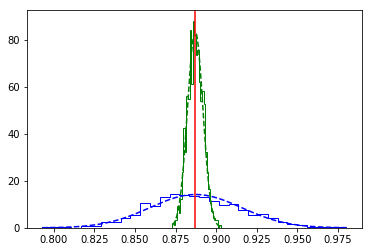

In [3]:
n_max = int(5e3)
n_samples = int(1e3)

samples = np.random.randn(n_samples, n_max) # n_samples échantillons
M0s = np.mean(f(samples), axis = 1)
plt.hist(M0s, bins=int(np.sqrt(n_samples)), histtype="step", density=True, color="blue")

# on ajuste une densite gaussienne 
x = np.linspace(np.min(M0s), np.max(M0s), 1000)
plt.plot(x, sps.norm.pdf(x, loc=np.mean(M0s), scale=np.std(M0s)), "b--")

# On repete n_samples fois
# le calcul de theta, puis de M en ce theta
Mtns = np.zeros(n_samples)
for j in range(n_samples):
    k, tn = 0, 0
    Gn, Hn = GH(tn, samples[j])
    while np.abs(Gn) > eps and k < iter_max:
        tn -= Gn / Hn
        Gn, Hn = GH(tn, samples[j])
        k += 1
    Mtns[j] = M(tn, samples[j])  

# on fait l'histogramme
plt.hist(Mtns, bins=int(np.sqrt(n_samples)), histtype="step", density=True, color="green")
# on superpose une densite gaussienne
x = np.linspace(np.min(Mtns), np.max(Mtns), 1000)
plt.plot(x, sps.norm.pdf(x, loc=np.mean(Mtns), scale=np.std(Mtns)), "g--")

# on calcule la moyenne theorique et on la trace
exact_value = np.exp(.5) * sps.norm.cdf(1-np.log(K)) - K*sps.norm.cdf(np.log(K))
plt.axvline(exact_value, color="r")

plt.show()

***
#### Question 9.

Reprendre la question précédente en dimension $d$ supérieure, pour la fonction 
$$
    f: x =(x_1,\dots,x_d)\mapsto \left(\frac{1}{d}\sum_{i=1}^d e^{x_i}-K\right)^+,
$$ 
qui correspond au calcul du prix d'un call sur moyenne.  On affichera le tracé des suites $\{M_n(\theta_n), n \geq 0\}$ et $\{M_n(0), n \geq 0\}$ ainsi que les histogrammes.

Vous pourrez utiliser les fonctions d'algèbre linéaire `numpy.dot`, `numpy.inner`, `np.eye`, `np.outer`, aisi que `numpy.linalg.inv` et `numpy.linalg.norm`.

In [4]:
# on va considérer la dimension d comme un axe supplémentaire qui sera toujours le dernier axis des np.array
d = 2
K = 1.
def f_md(x):
    # x peut etre un vecteur de R^d ou un échantillon de vecteurs de R^d
    # la dimension est sur le dernier axis
    return np.maximum(np.mean(np.exp(x), axis = len(x.shape)-1) - K, 0) 

# on redéfinit toutes les fonctions précédentes V, GH et M en version multidim.
def V_md(theta, sample):
    ak = f_md(sample)**2 * np.exp(- np.dot(sample, theta))
    return np.exp(0.5 * np.dot(theta, theta)) * np.mean(ak)

# attention cette fonction n'est pas écrite de façon optimale et est lente (utilisation de 2 boucles)
def GH_md(theta, sample):
    ak = f_md(sample)**2 * np.exp(- np.dot(sample, theta))
    Gn = np.mean([a * (theta - Xk) for a, Xk in zip(ak, sample)], axis = 0)
    Hn = np.mean([a * (np.eye(d) + np.outer(theta - Xk, theta - Xk)) for a, Xk in zip(ak, sample)], axis = 0)
    return Gn, Hn    

def M_md(theta, sample):
    ak = f_md(sample + theta) * np.exp(- np.dot(sample, theta))
    return np.exp(-0.5 * np.dot(theta, theta)) * np.mean(ak)

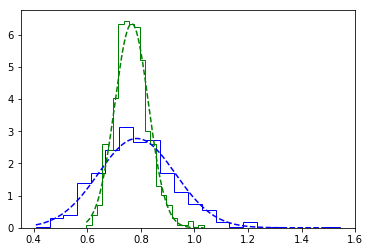

In [5]:
n_max = int(1e2)
n_samples = int(5e2)

samples = np.random.randn(n_samples, n_max, d)
M0s = np.mean(f_md(samples), axis = 1)
plt.hist(M0s, bins=int(np.sqrt(n_samples)), histtype="step", density = True, color="blue")
x = np.linspace(np.min(M0s), np.max(M0s), 1000)
plt.plot(x, sps.norm.pdf(x, loc=np.mean(M0s), scale=np.std(M0s)), "b--")

# l'algorithme s'écrit comme précédemment
Mtns = np.zeros(n_samples)
for j in range(n_samples):
    k, tn = 0, np.zeros(d)
    Gn, Hn = GH_md(tn, samples[j])
    while np.linalg.norm(Gn) > eps and k < iter_max:
        tn -= np.linalg.inv(Hn).dot(Gn)
        Gn, Hn = GH_md(tn, samples[j])
        k += 1
    Mtns[j] = M_md(tn, samples[j])  

plt.hist(Mtns, bins=int(np.sqrt(n_samples)), histtype="step", density = True, color="green")
# on superpose une densite gaussienne
x = np.linspace(np.min(Mtns), np.max(Mtns), 1000)
plt.plot(x, sps.norm.pdf(x, loc=np.mean(Mtns), scale=np.std(Mtns)), "g--")
plt.show()